## Task 1: Load data

In [3]:
import pandas as pd
#Fashion MNIST: clothes/shoes
mnist_test = pd.read_csv('/Users/tanianixon/Downloads/Math 10/final project/fashion-mnist_test.csv')
mnist_train = pd.read_csv('/Users/tanianixon/Downloads/Math 10/final project/fashion-mnist_train.csv')

**MNIST: X_train and y_train**

In [6]:
import numpy as np

mnist_train_column = mnist_train.loc[:,'label'] #only loan status
mnist_train_rest = mnist_train.loc[:, mnist_train.columns != 'label'] #everything else BUT loan status
y1 = mnist_train_column.values
X1 = mnist_train_rest.values

mnist_test_column = mnist_test.loc[:,'label']
mnist_test_rest = mnist_test.loc[:, mnist_test.columns != 'label']
y2 = mnist_test_column.values
X2 = mnist_test_rest.values

X_train = np.array(X1)
y_train = np.array(y1)
X_test = np.array(X2)
y_test = np.array(y2)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


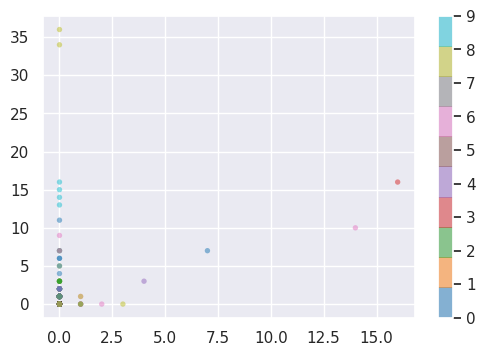

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

#plotting figure using matplotlib to visualize data.
figure = plt.figure(dpi = 100) #quality
plt.scatter(X_test[:, 0], X_test[:, 1], s = 15, c = y_test, edgecolor = 'none', alpha = 0.5, cmap = plt.cm.get_cmap('tab10', 10))
plt.xlabel
plt.ylabel
plt.colorbar();

*Result:* 

A quick visualization of the dataset.

## Task 2: Logistic Regression

**Model:**

In [38]:
#This is the class for logistic regression from the lecture notes
class log_reg():
    """ Logistic Regression classifier for a multiclass case.
    
    Parameters:
    -----------
    learning_rate: float
        The step length that will be taken when following the negative gradient during
        training.
    x : 1D numpy array
    y : 1D numpy array
        
    """
    def __init__(self, learning_rate = .1):
        """ 
        Initialize the learning rate
            
        """
        self.learning_rate = learning_rate
        

    def fit(self, data, y, n_iterations = 1000):
        """ 
        Minimizing (analytically or numerically) the Loss function L(B) on training data.
        Fit the function with X_train, y_train, and n_interations.
         
        Parameters:
        -----------
            x : 1D numpy array with shape (n_samples,) from training data
            y : 1D numpy array with shape (n_samples,) from training data
            
        Returns:
        --------
            self : returns an instance of self
        
        """
        c = max(y)+1
        self.K = c #specifies the number of classes in y
        ones = np.ones((data.shape[0],1)) #column of ones 
        X = np.concatenate((ones, data), axis = 1) # the augmented matrix or 
        # \tilde{X} in lecture
        eta = self.learning_rate
        
        W  = np.zeros((np.shape(X)[1], max(y)+1)) # initialize beta, can be other choices

        for k in range(n_iterations):
            dW = self.loss_gradient(W,X,y)
            W = W - eta * dW # the formula of gradient descent
            if k % 500 == 0: # print loss every 500 steps
                print("loss after", k+1, "iterations is: ", self.loss(W,X,y))
        
        self.coeff = W
        
    def predict(self, data):
        """
        Predict the output values for the input value x based on trained parameters
        
        Parameters:
        -----------
            x : 1D numpy array from test data
        
        Returns:
        --------
            returns 1D numpy array of same shape as input, the predicted y value according to x
            
        """
        ones = np.ones((data.shape[0],1)) # column of ones 
        X = np.concatenate((ones, data), axis = 1) # the augmented matrix, \tilde{X} in our lecture
        W = self.coeff # the estimated W
        y_pred = np.argmax(self.sigma(X,W), axis =1) # the category with largest probability
        return y_pred
    
    def score(self, data, y_true):
        """
        Using metrics pseudo R squared to evaluate the performace
        
        Parameters:
        -----------
            x : 1D numpy array from testing data
            y : 1D numpy array from testing data
        
        Returns:
        --------
            returns float, the pseudo R squared value
            
        """
        ones = np.ones((data.shape[0],1)) # column of ones 
        X = np.concatenate((ones, data), axis = 1) # the augmented matrix, \tilde{X} in our lecture
        y_pred = self.predict(data)
        acc = np.mean(y_pred == y_true) # number of correct predictions/N
        return acc
    
    def sigma(self,X,W): #return the softmax probability
        """
        The probability distribution with K probabilities 
        
        Parameters:
        -----------
            x : 1D numpy array from testing data
            w : self.W
            
        Returns:
        --------
            returns float, 0 or 1
            
        """
        s = np.exp(np.matmul(X,W))
        total = np.sum(s, axis=1).reshape(-1,1)
        return s/total
    
    def loss(self,W,X,y):
        """
        Evaluates how well the algorithm models the dataset 
        
        Parameters:
        -----------
            x : 1D numpy array from testing data
            y : 1D numpy array from testing data
            w : self.W
            
        Returns:
        --------
            returns float, the cross entropy loss function value
            
        """
        f_value = self.sigma(X,W)
        K = self.K 
        loss_vector = np.zeros(X.shape[0])
        for k in range(K):
            loss_vector += np.log(f_value+1e-10)[:,k] * (y == k)
        return -np.mean(loss_vector)
                          
    def loss_gradient(self,W,X,y):
        '''
        Evaluates the best set of parameters 
        
        Parameters:
        -----------
            x : 1D numpy array from testing data
            y : 1D numpy array from testing data
            w : self.W
            
        Returns:
        --------
            returns 1D array
            
        '''
        f_value = self.sigma(X,W)
        K = self.K 
        dLdW = np.zeros((X.shape[1],K))
        for k in range(K):
            dLdWk =(f_value[:,k] - (y==k)).reshape(-1,1)*X # Numpy broadcasting
            dLdW[:,k] = np.mean(dLdWk, axis=0)   # RHS is 1D Numpy array -- 
            #so you can safely put it in the k-th column of 2D array dLdW
        return dLdW

In [39]:
lg = log_reg(learning_rate = 1e-04)
lg.fit(X_train, y_train, n_iterations = 2500) #loss after 500 iterations, so there will be 5 iterations printed
lg.score(X_test,y_test) #accuracy

loss after 1 iterations is:  6.532929587423129
loss after 501 iterations is:  3.5978497345383906
loss after 1001 iterations is:  3.9994387949260912
loss after 1501 iterations is:  2.932221132446761
loss after 2001 iterations is:  5.227685292411837


0.78765

In [42]:
y_lg = lg.predict(X_test)

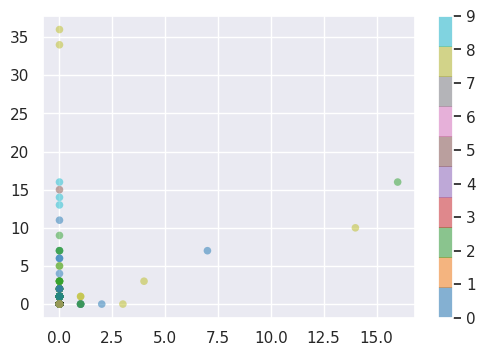

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

#plot visual for logistic regression
figure = plt.figure(dpi = 100)
plt.scatter(X_test[:, 0], X_test[:, 1], s = 30, c = y_lg, edgecolor = 'none', alpha = 0.5, cmap = plt.cm.get_cmap('tab10', 10))
plt.xlabel
plt.ylabel
plt.colorbar();

*Results:*

It's interesting to see that accuracy is 78% with 5 iterations because when it was done with only three there was a higher accuracy (about 83%). We can clearly see why by looking at the loss of the last interation "loss after 2001 iteration is: 5.227..." It increased, after a trend of decreasing. We also can see the the plot is already different from the plot of the original data set.

## Task 3: PCA

In [45]:
import numpy as np
#PCA model from lecture notes

class myPCA():
    """
    This PCA class function is from the lecture notes. This is an unsupervised learning method and is the Principal Component Analysis"'
    This PCA class function is a linear dimension reduction method using the covariance matrix.
    
    """
    
    def __init__(self, n_components = 350):
        """
        This function initializes 350 features to sort the dataset later on.
        
        """
        self.n_c = n_components
    
    def fit(self,X):
        """
        This function fits the X_train values into several matrices to calculate the principal components.
        
        Parameters:
        -----------
            x : 1D numpy array from training data
            
        Returns:
        --------
            returns 1D array
        
        """
        cov_mat = np.cov(X.T) #covariance matrix
        eig_val, eig_vec = np.linalg.eigh(cov_mat) #eigenvalues and orthogonal eigenvectors in ascending order
        eig_val = np.flip(eig_val) # reverse the order (for matrix transformation matrix)
        eig_vec = np.flip(eig_vec,axis = 1) #reverse the order (for matrix transformation matrix)
        self.eig_values = eig_val[:self.n_c] #selecting the top eigen values
        self.principle_components = eig_vec[:,:self.n_c] #select the top eigenvectors
        self.variance_ratio = self.eig_values/eig_val.sum() #the variance explained by each principal component
    
    def transform(self,X):
        """
        This function applies dimensionality reduction to X and X is projected on the first principal components previously taken from the mnist_train dataset
        
        Parameters:
        -----------
            x : 1D numpy array from test data
            
        Returns:
        --------
            returns principal components
            
        """
        return np.matmul(X-X.mean(axis = 0), self.principle_components) #projecting centered data on the principal components from X_train
    

**Explanation of formula use:**

In the fit function, we use two formulas with one being deconstructed into several lines. 

"cov_mat" is the covariance matrix, which is:

$$\Sigma =\frac{1}{n-1} X^{\top}X\in\mathbb{R}^{p\times p}.$$

The element $\Sigma$ is the covariance between variables.

Next we calculate the eigen-decomposition of the symmetrix covariance matrix: 

$$\Sigma = V\Lambda V^{\top}$$ 

where $V$ is the orthogonal matrix whose columns are unit eigenvectors and $\Lambda$ is the diagonal matrix of eigenvalues.

Thus, "eig_val, eig_vec = np.linalg.eigh(cov_mat)" is set to have the eigenvalues and orthogonal eigenvectors in ascending order. So, this is equivalent to $\Lambda$ and $V$ in the formula. Then, "eig_val" and "eig_val" are equivalent to $\Lambda^{T}$. 

Finally, we compute the variance of each principal component which is just the first columns of $V$ according to the top eigenvalues.


In [59]:
pca = myPCA(n_components = 350) #calling class function with 350 features
pca.fit(X_test) #fitting to X_test values
X_pca = pca.transform(X_test) #the values we will plot with

In [ ]:
pca.transform(X_test[0]) #first n principle component

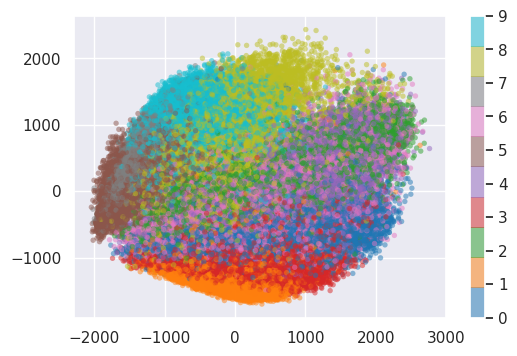

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

#This is all of the 10 categories by name in the data set given by the reference.
categories = ['Tshirt/Top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

#Now we make a true_label list to use as reference against any cluster function we're using.
#We will use true_label in comparison with PCA in this instance.
true_label = {0: 'Tshirt/Top', 1: 'Trouser', 2:'Pullover', 3: 'Dress', 4: 'Coat', 5: 'Sandal', 6: 'Shirt', 7: 'Sneaker', 8: 'Bag', 9:'Ankle boot'}

#plotting PCA visual from lecture notes
figure = plt.figure(dpi = 100)
plt.scatter(X_pca[:, 0], X_pca[:, 1], s = 15, c = y_test, edgecolor = 'none', alpha = 0.5, cmap = plt.cm.get_cmap('tab10', 10))
plt.xlabel
plt.ylabel
plt.colorbar();

*Results:*

In the PCA model plot above, we can clearly see each true label category in a different color to see the correlation it has with each other. Each category is grouped, some more then others like 5(brown) compared to 4(purple).

## Task 4: Other methods by calling function in Scikit-Learn

**Supervised task: Random Forest**

*Explanation:*

Random forest is an algorithm that builds a "forest" which is made up of decision trees. Then then takes these trees and combines them into one prediction. In the function, we classify n_estimators, this is just the number of trees that the algorithm builds. More trees means the algorithm runs longer but more accurate. n_jobs = -1 just means that there is no limit to how many processors we're allowed to use. 

Random forests applies the general technique of "bagging" which is combining ramdom samplings from the datasets to create multiple classifiers. 

So given the the training set: $X = x_{1}, x_{2},...,x{n}$ with responses $Y = y_{1}, y_{2},...,y{n}$, and $B$ (representing bagging) selects a random sample and then trains $X$ and $Y$ to train a classification of random forest.

Therefore, the average predictions from all the decision trees will account to this: 

$$\hat{f}=\frac{1}{B} \sum_{b=1}^{B} f_{b}\left(x^{\prime}\right)$$

where $f_{b}$ is the regression tree

In [29]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators = 100, max_depth = 70, n_jobs = -1) 
#The classifier makes 100 decision trees by random picking up 100% of the dataset, and each tree has the maximum depth of 70. 
#n_jobs = -1 means you ask to use all the processors of your computer
rf_clf.fit(X_train, y_train)
y_rf = rf_clf.predict(X_test)

1.0

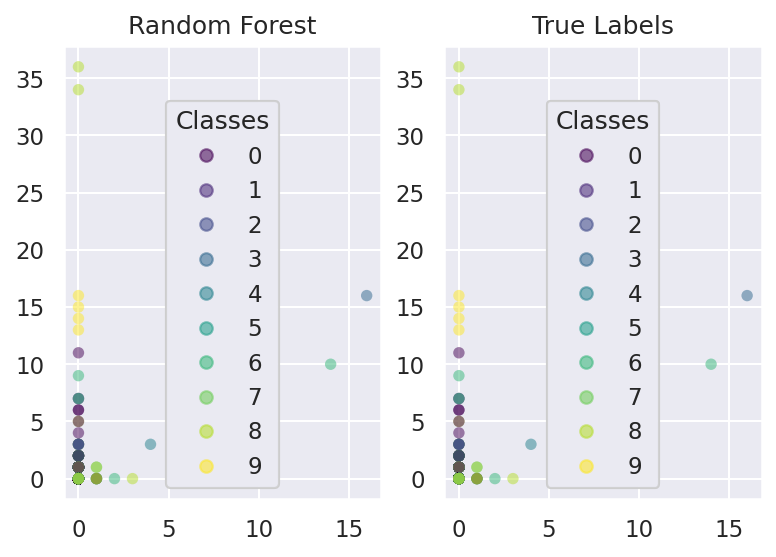

In [73]:
#plotting random forest and true labels to compare
fig, (ax1, ax2) = plt.subplots(1, 2, dpi = 150)
fig1 = ax1.scatter(X_test[:, 0], X_test[:, 1],c = y_rf, s = 30, edgecolor = 'none', alpha = 0.5, cmap = plt.cm.get_cmap('viridis', 10))
fig2 = ax2.scatter(X_test[:, 0], X_test[:, 1],c = y_pca, s = 30, edgecolor = 'none', alpha = 0.5, cmap = plt.cm.get_cmap('viridis', 10))
ax1.set_title('Random Forest')
legend1 = ax1.legend(*fig1.legend_elements(), loc = "best", title = "Classes")
ax1.add_artist(legend1)
ax2.set_title('True Labels')
legend2 = ax2.legend(*fig2.legend_elements(), loc = "best", title = "Classes")
ax2.add_artist(legend2)

*Results:*

For the data visualization and for the rest, I will be using the same color scheme because it is easier to see how accurate or inaccurate methods are compared to the true label. In this case of random forest, it is completely 100% accurate. Random forest is a cluster method, thus I compared it with true label. 

**Unsupervised task: KMeans clustering**

*Explanation:*

KMeans is a clustering model that is similar to decision tree. KMeans seperates n observations into k clusters that they are most alike to (closest mean). We are given a set of observations $(x^{(1)}, x^{(2)}, ..., x^{(n)})$, where each observation is a p-dimensional real vector. KMeans clustering divides the $n$ samples into $K (\leq n)$ sets $S = {S_1, S_2, ..., S_K}$ so as to minimize the variance. Thus, the objective is to find: 

$$\min_{S}\sum_{i=1}^{K}\sum_{x\in S_{i}}\|x-\mu_{i}\|^{2}$$

where $\mu_{i}$ is the mean of points in $S_i$ 

In [35]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 20, random_state = 0)
kmeans.fit(X_train)
y_k = kmeans.predict(X_test)

In [37]:
from sklearn import metrics
print(metrics.adjusted_rand_score(y_k, y_test)) #accuracy

0.33684633043209683


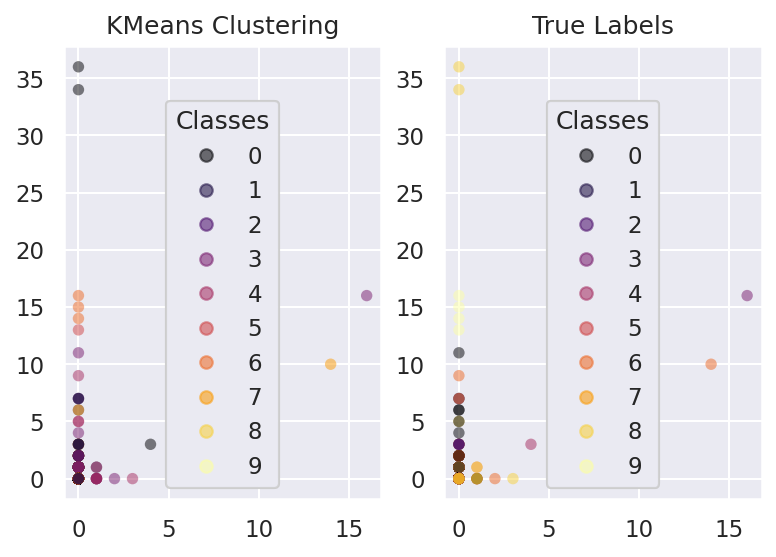

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

#plotting KMeans clustering and true labels to compare
fig, (ax1, ax2) = plt.subplots(1, 2, dpi=150)
fig1 = ax1.scatter(X_test[:, 0], X_test[:, 1],c = y_k, s = 30, edgecolor = 'none', alpha = 0.5, cmap = plt.cm.get_cmap('inferno', 10))
fig2 = ax2.scatter(X_test[:, 0], X_test[:, 1],c = y_test, s = 30, edgecolor = 'none', alpha = 0.5, cmap = plt.cm.get_cmap('inferno', 10))
ax1.set_title('KMeans Clustering')
legend1 = ax1.legend(*fig1.legend_elements(), loc = "best", title = "Classes")
ax1.add_artist(legend1)
ax2.set_title('True Labels')
legend2 = ax2.legend(*fig2.legend_elements(), loc = "best", title = "Classes")
ax2.add_artist(legend2)


*Results:*

On the other hand with Kmeans clustering we see that the accuracy is not good compared to other models. That is because kMeans has trouble clustering data where clusters are of varying sizes and density. There is also the issue of Euclidean distance because it is very bad with high dimensions.


## Task 5: More Scikit-learn

**Two supervised methods**: Decision Tree & kNN

**Decision tree:**

*Explanation:*

We fit the decision tree classifier with the already split train data. By repeatedly setting threshold for different features we can achieve the classification task.

Decision tree uses the Gini index to select from the n attributes of the dataset which attribute would be placed at the root node (m). Gini Index is a metric to measure how often a randomly chosen element would be incorrectly identified. Thus, we would prefer a lower Gini index. Entropy is the measure of uncertainty of a random variable, it characterizes the loss of the collection of examples. The higher the entropy the more the information content is.

Let the data $m$ be represented by $Q_{m}$ with $N_{m}$. The quality of a candidate split of $m$ is then computed using a loss function $H$. Thus, to classify we can use the following formulas:

**The Gini index:** $$H(Q_{m}) = \sum_{k}p_{mk}(1-p_{mk})$$

**Enthropy:** $$H(Q_{m}) = -\sum_{k}p_{mk}log(p_{mk})$$

With this we can compute the value of X_test.

In [51]:
#Decision Tree:
from sklearn import tree

dt_clf = tree.DecisionTreeClassifier(max_depth = 10) #the deeper, the longer it
# runs, but we have a good accuracy already so I decided on max_depth = 10
dt_clf.fit(X_train,y_train)
y_dt = dt_clf.predict(X_test)
dt_clf.score(X_test, y_test) 

0.84795

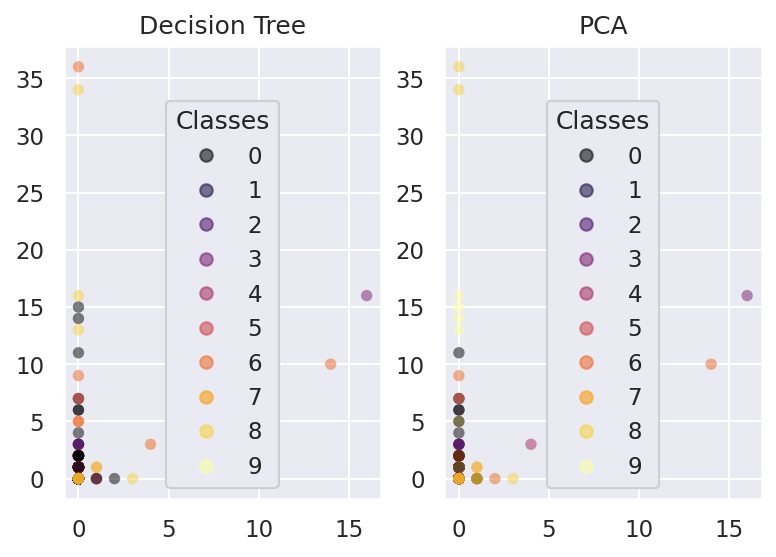

In [61]:
fig, (ax1, ax2) = plt.subplots(1, 2, dpi=150)

fig1 = ax1.scatter(X_test[:, 0], X_test[:, 1],c = y_dt, s = 30, edgecolor = 'none', alpha = 0.5, cmap = plt.cm.get_cmap('inferno', 10))
fig2 = ax2.scatter(X_test[:, 0], X_test[:, 1],c = y_test, s = 30, edgecolor = 'none', alpha = 0.5, cmap = plt.cm.get_cmap('inferno', 10))
ax1.set_title('Decision Tree')
legend1 = ax1.legend(*fig1.legend_elements(), loc = "best", title = "Classes")
ax1.add_artist(legend1)
ax2.set_title('PCA')
legend2 = ax2.legend(*fig2.legend_elements(), loc = "best", title = "Classes")
ax2.add_artist(legend2)

*Results:*

The accuracy of decision tree is lower then the PCA model. However, it is very close and not drastic in comparison as KMeans.  

**K nearest neighbor:**

*Explanation:*

KNN is a supervised learning model used for classification. First, we initialize K to your chosen number of neighbors. Then, we calculate calculate Euclidean distance and then we are returned the mode of the K labels.

**Euclidean distance:** 

$$\sqrt{\sum_{i=1}^n(q^i-p^i)^2}$$

Once distances are calculated, we must sort by their distance to the new data. We can then select the top k to return as the most similar neighbors. Thus, in classification, we can return the most represented class among the neighbors.

In [56]:
#KNN model
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

knn = KNeighborsClassifier(n_neighbors = 1, p = 2,)
knn.fit(X_train, y_train)
y_knn = knn.predict(X_test)

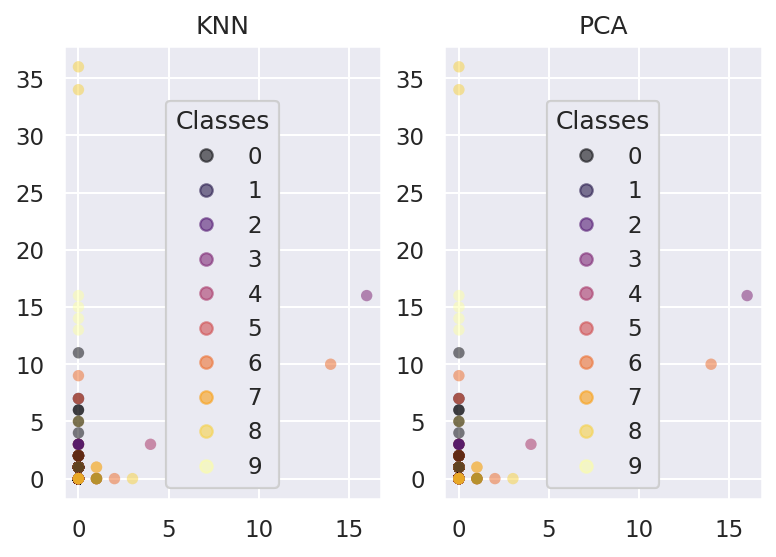

In [60]:
fig, (ax1, ax2) = plt.subplots(1, 2, dpi=150)

fig1 = ax1.scatter(X_test[:, 0], X_test[:, 1],c = y_knn, s = 30, edgecolor = 'none', alpha = 0.5, cmap = plt.cm.get_cmap('inferno', 10))
fig2 = ax2.scatter(X_test[:, 0], X_test[:, 1],c = y_test, s = 30, edgecolor = 'none', alpha = 0.5, cmap = plt.cm.get_cmap('inferno', 10))
ax1.set_title('KNN')
legend1 = ax1.legend(*fig1.legend_elements(), loc = "best", title = "Classes")
ax1.add_artist(legend1)
ax2.set_title('PCA')
legend2 = ax2.legend(*fig2.legend_elements(), loc = "best", title = "Classes")
ax2.add_artist(legend2)

*Results:*

The results in comparison of KNN and PCa is 100%. They are completely the same just how random forest and PCA are.

**Unsupervised method: Gaussian Mixture**

Guassian Mixture is a clustering algorithm and is a probabilistic model for representing the presence of subpopulations within an overall population. In this case, we will be using the multi-dimensional model. The Gaussian model is parameterized by the mixture component weights and the component means and variances/covariances.

Thus a model with $K$ components, the $k^{th}$ has a mean of $\vec{\mu_{k}}$ and a covariance matrix of $\Sigma_{k}$. The mixture components are defined as $\phi_{k}$ for component $C_{k}$. Therefore, the functions used for the model are:$$p(\vec{x})=\sum_{i=1}^{K} \phi_{i} \mathcal{N}\left(\vec{x} \mid \vec{\mu}_{i}, \Sigma_{i}\right)
$$

where, 
$$
\mathcal{N}\left(\vec{x} \mid \vec{\mu}_{i}, \Sigma_{i}\right)=\frac{1}{\sqrt{(2 \pi)^{K}\left|\Sigma_{i}\right|}} \exp \left(-\frac{1}{2}\left(\vec{x}-\vec{\mu}_{i}\right)^{\mathrm{T}} \Sigma_{i}^{-1}\left(\vec{x}-\vec{\mu}_{i}\right)\right) \\
\sum_{i=1}^{K} \phi_{i}=1
$$

In [15]:
from sklearn.mixture import GaussianMixture
gm = GaussianMixture(n_components = 10, random_state = 0)
gm.fit(X_train) #learns a Gaussian model from train data. Given test data, it can assign to each sample the Gaussian 
# it will belong to using the predict method.
y_gm = gm.predict(X_test)

In [54]:
metrics.adjusted_rand_score(y_gm, y_test) #accuracy through metrics

0.3101861439999356

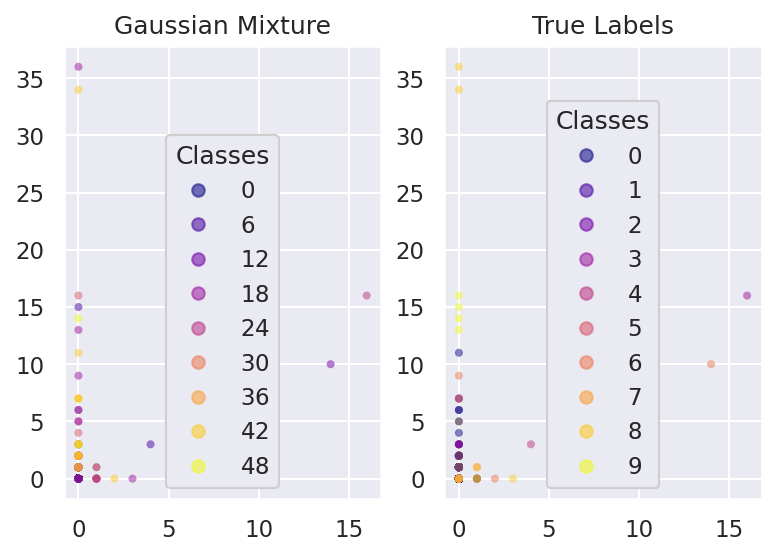

In [54]:
#plotting the Gaussian mixture visual in comparison to true labels since it is a clustering method.
fig, (ax1, ax2) = plt.subplots(1, 2,dpi = 150)

fig1 = ax1.scatter(X_test[:, 0], X_test[:, 1],c = y_gm, s = 30, edgecolor = 'none', alpha = 0.5, cmap = plt.cm.get_cmap('plasma', 10))
fig2 = ax2.scatter(X_test[:, 0], X_test[:, 1],c = y_test, s = 30, edgecolor = 'none', alpha = 0.5, cmap = plt.cm.get_cmap('plasma', 10))
ax1.set_title('Gaussian Mixture')
legend1 = ax1.legend(*fig1.legend_elements(), loc = "best", title = "Classes")
ax1.add_artist(legend1)
ax2.set_title('True Labels')
legend2 = ax2.legend(*fig2.legend_elements(), loc = "best", title = "Classes")
ax2.add_artist(legend2)

*Results:*

The Gaussian model has bad accuracy (31%), the worst of all the models run beforehand. This makes sense because it is a density estimation. They will not always coincidentally aline thus, this is why supervised methods yield higher performance then unsupervised methods. 